#Diabetes prediction


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

In [3]:
df=pd.read_csv('D:\Yash\projects\Diabetes Prediction\dataset\diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

 We can see there are few data columns Glucose,BloodPressure,SkinThickness,Inslin ,BMI which have 0 values. That is not possible. so we can either remove this data or replace with their respective mean values.

In [7]:
# Replaceing 0 values with their respective means
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].mean())
df['BMI']=df['BMI'].replace(0,df['BMI'].mean())

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

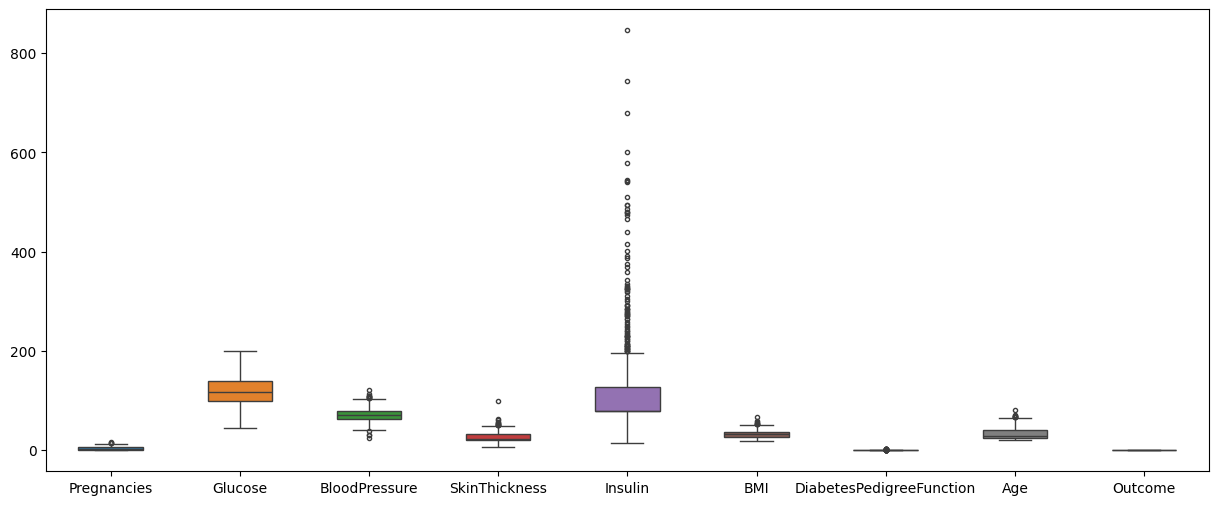

In [9]:
# There are some outliers in the dataset so we have to visualize it.
plt.figure(figsize=(15,6))
sns.boxplot(df,width=0.5,fliersize=3)

In [10]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [11]:
#Segrate into Dependent and Independent Features
x=df.drop(columns=['Outcome'],axis=1)
y=df['Outcome']

In [12]:
# divide into train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.30)

In [13]:
x_train.shape,x_test.shape

((537, 8), (231, 8))

In [14]:
import pickle

# Standard Scaler scaling
def standard_scaler(x_train,x_test):
    #Scaling the data
    scaler=StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)

    #Saving the model

    file = open('D:\Yash\projects\Diabetes Prediction\Model/standardscaler.pkl','wb')
    pickle.dump(scaler,file)
    file.close()

    return x_train_scaled,x_test_scaled

In [15]:
x_train_scaled,x_test_scaled = standard_scaler(x_train,x_test)

In [16]:
x_train_scaled

array([[-1.13311543,  0.93799948,  1.43692936, ...,  1.34233669,
        -0.3002719 , -1.05654479],
       [-0.8391623 , -1.29566732, -0.41000922, ..., -2.08218643,
         0.45699051, -0.55622332],
       [-0.54520916, -0.01459371, -0.24210571, ...,  0.58292361,
        -0.39305899, -0.55622332],
       ...,
       [ 0.0426971 , -0.93433887, -0.66186448, ..., -1.15083077,
        -0.96774035, -1.05654479],
       [ 2.10036903, -1.22997124,  0.0937013 , ..., -0.37708914,
        -0.51278428,  0.11087198],
       [ 0.33665024,  0.44527886,  0.76531533, ..., -0.10591017,
         0.50488062,  2.94602702]])

In [17]:
log_reg=LogisticRegression()
log_reg.fit(x_train_scaled,y_train)

LogisticRegression()

In [18]:
# hyperparameters tuning
## GFridSearchCV
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

# Parameters grid
param={
       'penalty': ['l1','l2'],
       'C'      : np.logspace(-3,3,7),
       'solver' : ['liblinear', 'newton-cg', 'lbfgs']
}


In [19]:
logreg=LogisticRegression()
clf=GridSearchCV(logreg,                  # model
                 param_grid = param,      # Hyperparameter
                 cv = 10,                 # number of folds
                 scoring = 'accuracy')    # metric for scoring

In [20]:
clf.fit(x_train_scaled,y_train)


GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'newton-cg', 'lbfgs']},
             scoring='accuracy')

In [21]:
clf.best_params_

{'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}

In [22]:
clf.best_score_

0.7708944793850454

Lets see how our model perform on test dataset

In [23]:
y_pred=clf.predict(x_test_scaled)

In [24]:
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[139,  18],
       [ 36,  38]], dtype=int64)

In [25]:
true_positive  = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative  = conf_mat[1][1]

In [26]:
accuracy = (true_positive + true_negative)/(true_positive + true_negative + false_positive + false_negative)
accuracy

0.7662337662337663

In [27]:
precision = true_positive/(true_positive + false_positive)
precision

0.8853503184713376

In [28]:
recall = true_positive/(true_positive + false_negative)
recall

0.7942857142857143

In [29]:
f1_score = 2*(recall * precision)/ (recall + precision)
f1_score

0.8373493975903615

In [30]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
from sklearn.metrics import f1_score
print(f1_score(y_test,y_pred))

0.7662337662337663
[[139  18]
 [ 36  38]]
0.5846153846153848


In [31]:
import pickle
file = open('D:\Yash\projects\Diabetes Prediction\Model\Modelforprediction.pkl','wb')
pickle.dump(log_reg,file)
file.close()